## Basic Usage

### Calculate Indicators

Use `download_data` function to download data using `yfinance` and use `compute_indicator` function to compute a technical indicator.


Computing ADX...


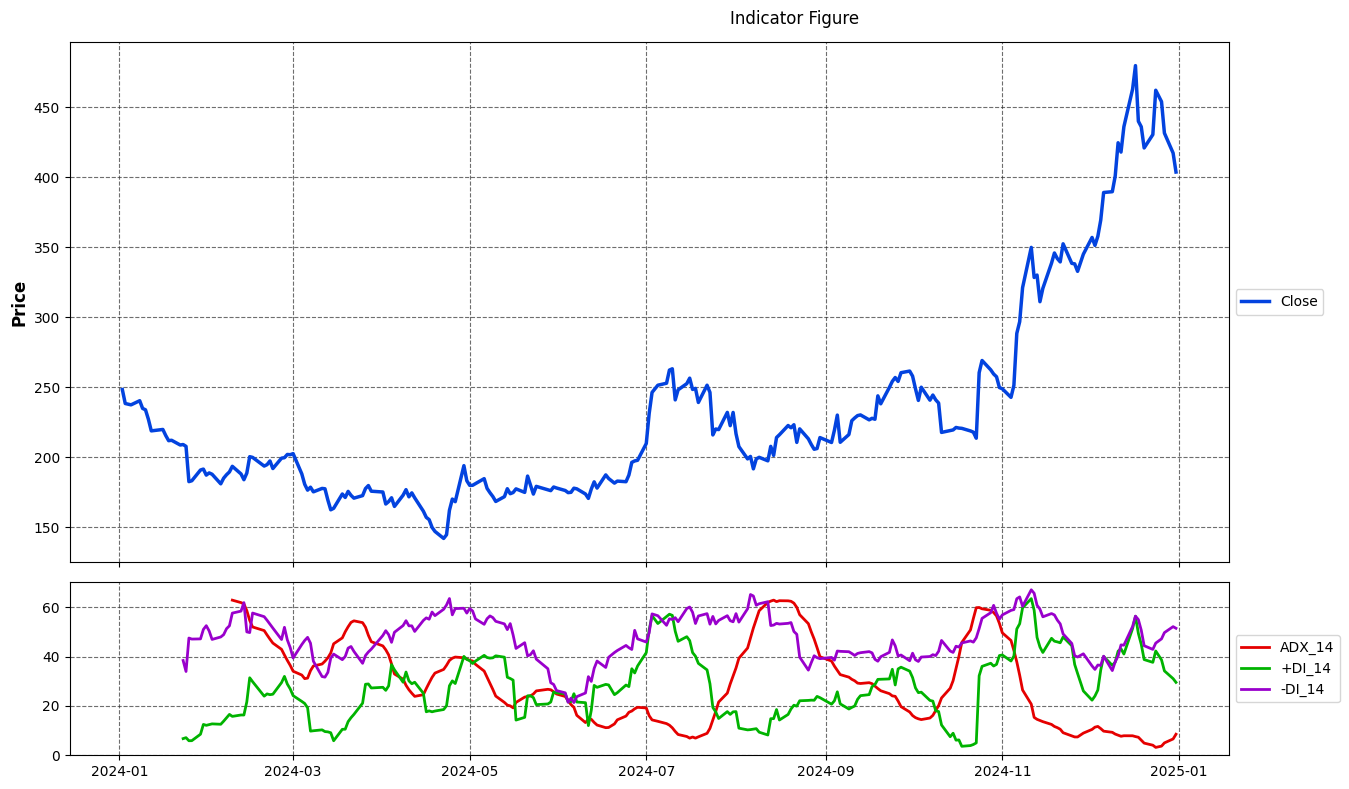

In [1]:
# Example for downloading data and computing a technical indicator

# Load packages and functions
from simple_trade import compute_indicator, download_data
from simple_trade import list_indicators

# Step 1: Download data
symbol = 'TSLA'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["window"] = 14
data, columns, fig = compute_indicator(
    data=data,
    indicator='adx',
    parameters=parameters
)

In [2]:
# To see a list of all indicators, use `list_indicators()` function.

list_indicators()


AVAILABLE TECHNICAL INDICATORS


────────────────────────────────────────────────────────────────────────────────
MOMENTUM INDICATORS (30 total)
────────────────────────────────────────────────────────────────────────────────

  • AWO
    Calculates the Awesome Oscillator (AO), a momentum indicator used to
    measure market momentum.

  • BOP
    Calculates the Balance of Power (BOP), an indicator that measures the
    strength of buyers

  • CCI
    Calculates the Commodity Channel Index (CCI), a momentum oscillator used
    to identify cyclical trends

  • CMO
    Calculates the Chande Momentum Oscillator (CMO), a technical momentum
    indicator developed by Tushar Chande.

  • COG
    Calculates the Center of Gravity (COG), a momentum indicator developed
    by John Ehlers.

  • CRS
    Calculates the Connors RSI (CRSI), a composite indicator designed by
    Larry Connors

  • DPO
    Calculates the Detrended Price Oscillator (DPO), an indicator designed
    to remove trend

  • 

### Backtesting Strategies

Use the `run_premade_trade` function to select from premade strategies or create your custom strategies using `run_cross_trade`/`run_band_trade` functions.

Computing SMA...
Computing SMA...

              ✨ Cross Trade (SMA_25/SMA_75) ✨               

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Periods: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $13,199.32
  • Total Return: 31.99%
  • Annualized Return: 10.80%
  • Number of Trades: 16
  • Total Commissions: $237.12

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 87.48%
  • Benchmark Final Value: $18,748.45
  • Strategy vs Benchmark: -55.49%

📉 RISK METRICS:
  • Sharpe Ratio: 0.530
  • Sortino Ratio: 0.500
  • Maximum Drawdown: -32.50%
  • Average Drawdown: -14.25%
  • Max Drawdown Duration: 360 days
  • Avg Drawdown Duration: 43.43 days
  • Annualized Volatility: 25.89%



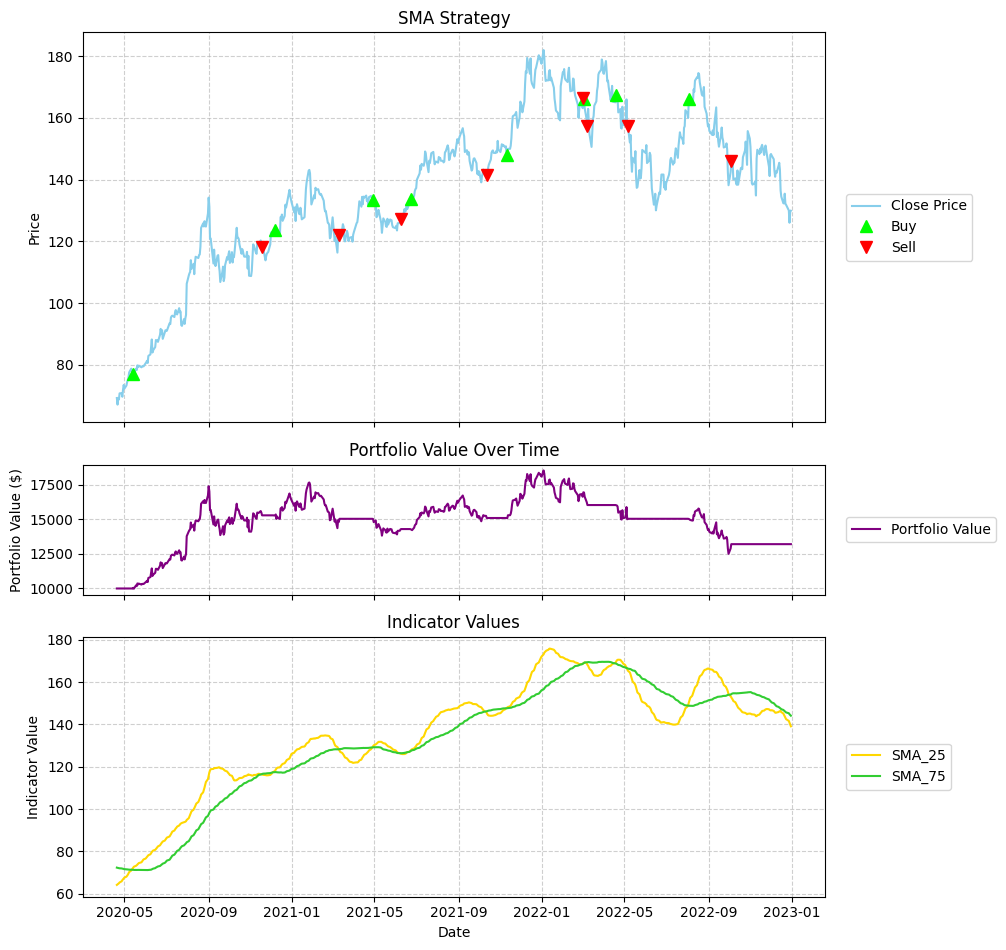

In [3]:
# Example for backtesting a premade strategy

# Load packages and functions
from simple_trade import download_data
from simple_trade import run_premade_trade
from simple_trade import list_premade_strategies
from simple_trade import print_results

# Step 1: Download data
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
data = download_data(symbol, start_date, end_date, interval=interval)

# Step 2: Set global parameters
global_parameters = {
    'initial_cash': 10000,
    'commission_long': 0.001,
    'commission_short': 0.001,
    'short_borrow_fee_inc_rate': 0.0,
    'long_borrow_fee_inc_rate': 0.0,
    'trading_type': 'long',
    'day1_position': 'none',
    'risk_free_rate': 0.0,
}

# Step 3: Set strategy parameters
strategy_name = 'sma'
specific_parameters = {
    'short_window': 25,
    'long_window': 75,
    'fig_control': 1,
}

# Step 4: Run backtest
parameters = {**global_parameters, **specific_parameters}
results, portfolio, fig = run_premade_trade(data, strategy_name, parameters)

# Step 5: Display and print results
print_results(results)

In [4]:
# To see a list of all indicators, use `list_premade_strategies()` function.

list_premade_strategies()


AVAILABLE PREMADE BACKTEST STRATEGIES


────────────────────────────────────────────────────────────────────────────────
MOMENTUM STRATEGIES (30 total)
────────────────────────────────────────────────────────────────────────────────

  • AWO
    AWO (Awesome Oscillator) - Zero Line Crossover Strategy

  • BOP
    BOP (Balance of Power) - Zero Line Crossover Strategy

  • CCI
    CCI (Commodity Channel Index) - Mean Reversion Strategy

  • CMO
    CMO (Chande Momentum Oscillator) - Mean Reversion Strategy

  • COG
    COG (Center of Gravity) - Signal Line Crossover Strategy

  • CRS
    CRS (Connors RSI) - Mean Reversion Strategy

  • DPO
    DPO (Detrended Price Oscillator) - Zero Line Crossover Strategy

  • ERI
    ERI (Elder-Ray Index) - Bear Power Zero Line Crossover Strategy

  • FIS
    FIS (Fisher Transform) - Zero Line Crossover Strategy

  • IMI
    IMI (Intraday Momentum Index) - Mean Reversion Strategy

  • KST
    KST (Know Sure Thing) - Signal Line Crossover Strategy

  •

### Optimizing Strategies

Use the `premade_optimizer` function to find the best parameters for your premade strategies or optimize your custom strategies using `custom_optimizer` function.

In [5]:
# Example for optimizing a premade strategy

# Load packages and functions
from simple_trade import download_data
from simple_trade import premade_optimizer

# Step 1: Load data
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"

data = download_data(ticker, start_date, end_date)

# Step 2: Load optimization parameters
# Define the parameter grid to search
param_grid = {
    'short_window': [10, 20, 30],
    'long_window': [50, 100, 150],
}

# Step 3: Set base parameters
base_params = {
    'initial_cash': 100000.0,
    'commission_long': 0.001,         # 0.1% commission
    'commission_short': 0.001,
    'trading_type': 'long',           # Only long trades
    'day1_position': 'none',
    'risk_free_rate': 0.02,
    'metric': 'total_return_pct',     # Metric to optimize
    'maximize': True,                 # Maximize the metric
    'parallel': False,                # Sequential execution for this example
    'fig_control': 0                  # No plotting during optimization
}

# Step 4: Run optimization
best_results, best_params, all_results = premade_optimizer(
    data=data,
    strategy_name='sma',
    parameters=base_params,
    param_grid=param_grid
)

# Step 5: Show top 3 parameter combinations
print("\nTop 3 SMA Parameter Combinations:")
sorted_results = sorted(all_results, key=lambda x: x['score'], reverse=True)
for i, result in enumerate(sorted_results[:3]):
    print(f"  {i+1}. {result['params']} -> {result['score']:.2f}%")

Generated 9 parameter combinations.
Starting optimization for 9 combinations...
Metric: total_return_pct (Maximize) | Parallel: False
  Testing combination 1/9: {'short_window': 10, 'long_window': 50}
Computing SMA...
Computing SMA...
  Testing combination 2/9: {'short_window': 10, 'long_window': 100}
Computing SMA...
Computing SMA...
  Testing combination 3/9: {'short_window': 10, 'long_window': 150}
Computing SMA...
Computing SMA...
  Testing combination 4/9: {'short_window': 20, 'long_window': 50}
Computing SMA...
Computing SMA...
  Testing combination 5/9: {'short_window': 20, 'long_window': 100}
Computing SMA...
Computing SMA...
  Testing combination 6/9: {'short_window': 20, 'long_window': 150}
Computing SMA...
Computing SMA...
  Testing combination 7/9: {'short_window': 30, 'long_window': 50}
Computing SMA...
Computing SMA...
  Testing combination 8/9: {'short_window': 30, 'long_window': 100}
Computing SMA...
Computing SMA...
  Testing combination 9/9: {'short_window': 30, 'long

### Combining Strategies

Use the `run_combined_trade` function to combine multiple strategies.

In [6]:
# Example for combining premade strategies

# Load packages and functions
from simple_trade import download_data
from simple_trade import run_premade_trade
from simple_trade import run_combined_trade

# Step 1: Download data
print("Downloading stock data...")
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
data = download_data(symbol, start_date, end_date, interval=interval)

# Step 2: Set global parameters
global_parameters = {
    'initial_cash': 10000,
    'commission_long': 0.001,
    'commission_short': 0.001,
    'short_borrow_fee_inc_rate': 0.0,
    'long_borrow_fee_inc_rate': 0.0,
    'trading_type': 'long',
    'day1_position': 'none',
    'risk_free_rate': 0.0,
}

# Step 3: Compute RSI strategy
rsi_params = {
    'window': 14,
    'upper': 70,
    'lower': 30,
    'fig_control': 0
}

rsi_params = {**global_parameters, **rsi_params}
rsi_results, rsi_portfolio, _ = run_premade_trade(data, "rsi", rsi_params)

# Step 4: Compute SMA strategy 
sma_params = {
    'short_window': 20,
    'long_window': 50,
    'fig_control': 0
}

sma_params = {**global_parameters, **sma_params}
sma_results, sma_portfolio, _ = run_premade_trade(data, "sma", sma_params)

# Step 5: Combine RSI and SMA strategies 
strategies = {
    'RSI': {'results': rsi_results, 'portfolio': rsi_portfolio},
    'SMA': {'results': sma_results, 'portfolio': sma_portfolio}
}
combined_results, combined_portfolio, _ = run_combined_trade(
    portfolio_dfs=[rsi_portfolio, sma_portfolio],
    price_data=data,
    price_col='Close',
    combination_logic='majority',
    trading_type='long',
    fig_control=0,
    strategies=strategies,
    strategy_name='Majority',
    initial_cash=200,
    commission_long=0.001,
    commission_short=0.001
)

# Step 6: Show results
print(f"2 Trading Strategy Combination - Final Value: ${combined_results['final_value']:.2f}")
print(f"2 Trading Strategy Combination - Total Return: {combined_results['total_return_pct']}%")
print(f"2 Trading Strategy Combination - Number of Trades: {combined_results['num_trades']}")
print(f"2 Trading Strategy Combination - Sharpe Ratio: {combined_results['sharpe_ratio']:.3f}")

Computing RSI...
Computing SMA...
Computing SMA...
2 Trading Strategy Combination - Final Value: $318.11
2 Trading Strategy Combination - Total Return: 59.16%
2 Trading Strategy Combination - Number of Trades: 13
2 Trading Strategy Combination - Sharpe Ratio: 0.780
